### Exploratory Data Analysis  

## Table of Contents

- 1. [Load the packages and data](#section2)</br>
 
- 2. [Identify patterns in the data](#section5)</br>
    - 2.0 [Pair Plot](#section514)<br/>
    - 2.1 [lineChart](#section511)<br/>
    - 2.2 [Heat Map  ](#section501)<br/>
    - 2.3 [Joint Plot](#section502)<br/>
    - 2.4 [HeaxBin Plot](#section503)<br/>
    - 2.5 [Histogram Plot](#section504)<br/>
    - 2.6 [Box Plot ](#section505)<br/>
    - 2.7 [Line Chart  ](#section506)<br/>
    - 2.8 [Distribution PLot](#section507)<br/>
    - 2.9 [Bar Chart ](#section507)<br/>
    - 2.9 [HexaBin Chart ](#section507)<br/>

In [1]:
#loading the libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as mo
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew #ma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
%matplotlib inline

### Loading The Dataset  

In [2]:
# loading the dataset 

df=pd.read_csv('trends1.csv',parse_dates=True)

In [3]:
df.head()

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  261 non-null    int64 
 1   top 1       261 non-null    int64 
 2   top 2       261 non-null    int64 
 3   top 3       261 non-null    int64 
 4   date        261 non-null    object
dtypes: int64(4), object(1)
memory usage: 10.3+ KB


In [5]:
df2 =pd.read_csv('predictions.csv')

In [6]:
df2.head()

,Unnamed: 0,date,fit top 1,fit top 2,fit top 3,fit2 top 1,fit2 top 2,fit2 top 3,fit3 top 1,fit3 top 2,fit3 top 3
0,0,07-10-2012,6.464020,14.918372,12.852700,6.676299,21.967562,17.560586,6.814028,19.348604,16.691433
1,1,14-10-2012,6.405044,14.879459,13.460605,6.553469,20.428943,17.584433,6.678460,18.149665,16.864402
2,2,21-10-2012,5.594880,12.766397,12.500809,5.685904,17.533925,16.287381,5.801919,15.621429,15.672930
3,3,28-10-2012,4.556118,9.883558,11.040882,4.598339,14.478612,14.667064,4.706192,13.020325,14.128378
4,4,04-11-2012,4.203193,8.345088,10.553082,4.200978,12.894532,14.029395,4.297650,11.970428,13.566908


In [7]:
df.describe()

,Unnamed: 0,top 1,top 2,top 3
count,261.00000,261.000000,261.000000,261.000000
mean,130.00000,11.796935,36.233716,23.452107
std,75.48841,8.474904,26.619017,8.180336
min,0.00000,3.000000,9.000000,10.000000
25%,65.00000,4.000000,17.000000,16.000000
50%,130.00000,6.000000,22.000000,23.000000
75%,195.00000,20.000000,55.000000,29.000000
max,260.00000,29.000000,100.000000,43.000000


In [8]:
# starting with the data frame of trends.csv 
 # droping the unwanted column :unnameed :0
 # then we study the trends and Patterns in the given data range 26
  # then we check the kurtosis and skew of each variable   
  # we apply pandas profiling to get a detail analysis 

# Deleting the unwanted columns

In [9]:
# let get started 


df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [49]:
df.head()

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   top 1   261 non-null    int64 
 1   top 2   261 non-null    int64 
 2   top 3   261 non-null    int64 
 3   date    261 non-null    object
dtypes: int64(3), object(1)
memory usage: 8.3+ KB


In [12]:
df.describe()

,top 1,top 2,top 3
count,261.000000,261.000000,261.000000
mean,11.796935,36.233716,23.452107
std,8.474904,26.619017,8.180336
min,3.000000,9.000000,10.000000
25%,4.000000,17.000000,16.000000
50%,6.000000,22.000000,23.000000
75%,20.000000,55.000000,29.000000
max,29.000000,100.000000,43.000000


In [13]:
df['top 1'].unique()

array([ 4,  7,  5,  3,  6,  8, 10, 11, 12, 13, 17, 15, 18, 20, 23, 19, 26,
       24, 21, 29, 27, 28, 25, 22, 16], dtype=int64)

In [14]:
df['top 2'].unique()

array([ 14,  15,  12,  17,   9,  13,  11,  16,  18,  19,  20,  10,  21,
        22,  23,  24,  26,  25,  29,  27,  32,  30,  28,  41,  38,  42,
        45,  40,  51,  48,  53,  52,  67,  61,  64,  74,  77,  88,  78,
        83,  92,  84,  97,  98,  91,  93,  82,  80,  86,  87,  81,  70,
        72,  60,  55,  58,  57,  49,  54,  59,  66,  90, 100,  96,  95,
        89,  73,  62], dtype=int64)

In [15]:
df['top 3'].unique()

array([14, 18, 15, 12, 10, 11, 16, 13, 17, 23, 21, 20, 24, 26, 25, 27, 19,
       22, 29, 31, 32, 30, 34, 28, 36, 38, 41, 37, 39, 40, 33, 35, 42, 43],
      dtype=int64)

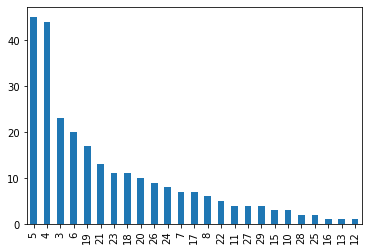

In [16]:
df['top 1'].value_counts().plot(kind='bar')

In [17]:
df['top 2'].value_counts()


16    20
21    15
17    14
15    14
14    13
      ..
49     1
42     1
41     1
40     1
9      1
Name: top 2, Length: 68, dtype: int64

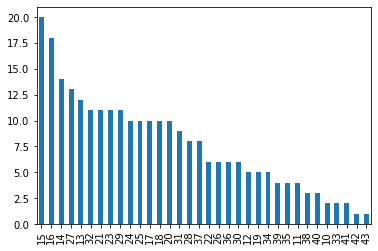

In [18]:
df['top 3'].value_counts().plot(kind='bar')

In [19]:
df['date'].unique()

array(['2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
       '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
       '2012-12-02', '2012-12-09', '2012-12-16', '2012-12-23',
       '2012-12-30', '2013-01-06', '2013-01-13', '2013-01-20',
       '2013-01-27', '2013-02-03', '2013-02-10', '2013-02-17',
       '2013-02-24', '2013-03-03', '2013-03-10', '2013-03-17',
       '2013-03-24', '2013-03-31', '2013-04-07', '2013-04-14',
       '2013-04-21', '2013-04-28', '2013-05-05', '2013-05-12',
       '2013-05-19', '2013-05-26', '2013-06-02', '2013-06-09',
       '2013-06-16', '2013-06-23', '2013-06-30', '2013-07-07',
       '2013-07-14', '2013-07-21', '2013-07-28', '2013-08-04',
       '2013-08-11', '2013-08-18', '2013-08-25', '2013-09-01',
       '2013-09-08', '2013-09-15', '2013-09-22', '2013-09-29',
       '2013-10-06', '2013-10-13', '2013-10-20', '2013-10-27',
       '2013-11-03', '2013-11-10', '2013-11-17', '2013-11-24',
       '2013-12-01', '2013-12-08', '2013-12-15', '2013-

In [20]:
#df.groupby(['top 1','top 2','top 3'])('date').value_counts()

## Pair plot

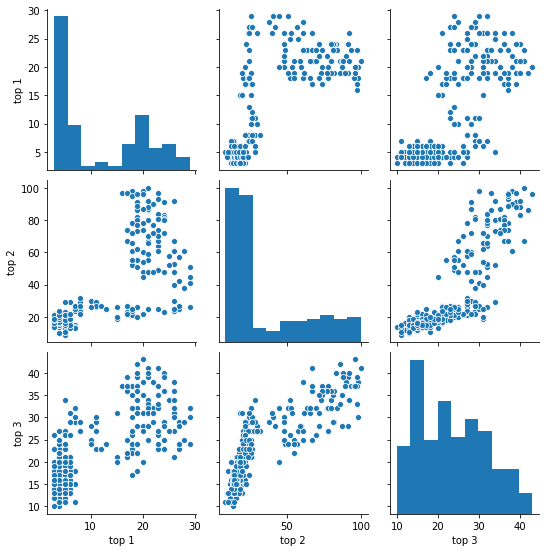

In [21]:
sb.pairplot(data=df)

### Observation

- The Pair plot show the relationships between the different type of variables .
- it aslo help in understanding the pairing of each variable with other 


## Hexabin  plot

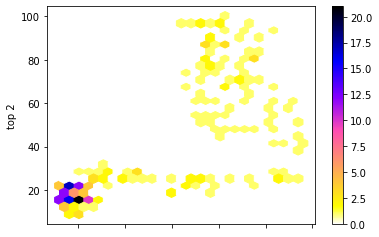

In [22]:
df.plot.hexbin(x='top 1', y='top 2', gridsize=25, cmap='gnuplot2_r')

### Observation

- The Hexa bin  plot show the grouping of same type of variables .
- it aslo help group them into a count of 6

## Heat Map  plot

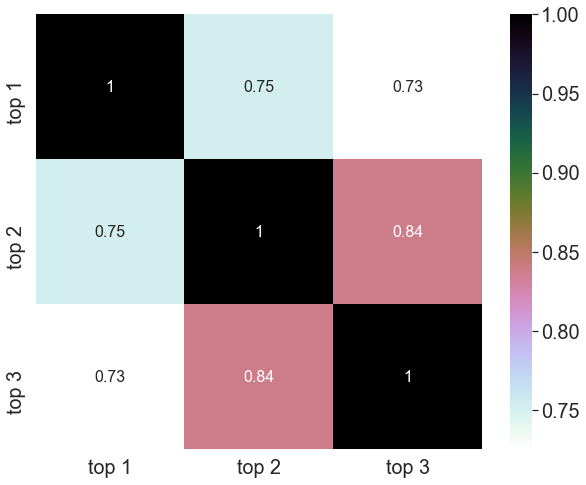

In [23]:
corr_mat = df.corr()
sb.set(font_scale=1.8)
plt.figure(figsize=(10,8))
sb.heatmap(corr_mat, annot=True,  cmap='cubehelix_r' , annot_kws={"size": 16},)

### Observation

- The Heat Map  plot show the correlation between among the different types variables .
- it aslo help us in understanding the feature imortance 
- here we see that correlation of variable top 1 and top 3 is 0.73

##  Joint Plot

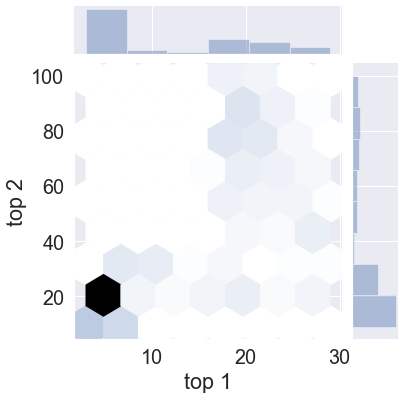

In [24]:
sb.jointplot("top 1", "top 2", data=df, kind='hex')

### Observation

- The Joint plot show the joint plot  between among the different two variables .
- it aslo groups the similarity within them and group thm in one

## Histogram plot 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B296C1BC8>,
      dtype=object)

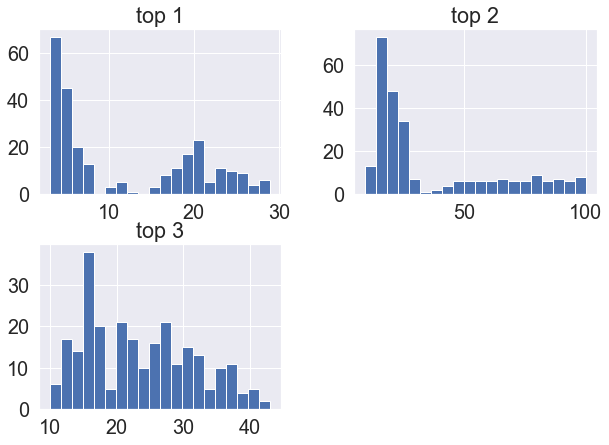

In [25]:
df.hist(bins = 20,figsize=(10,7))

### Observation:

 - The above graph shows us a histogram chart of all the three variables

## Box Plot:

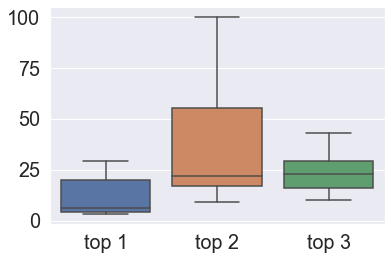

In [26]:
sb.boxplot(data=df)
plt.ioff()

### Observation

- The Box Plot shows the are distributed in the box
- the lower end is called the lower whisker 
- the upper end is called the upper whisker
- the central is the median where the box plot is divided into the equal half
- from the above fig it is quite evident that the box plot of top 2 has the more area dispersed in th second half

## Line Chart:

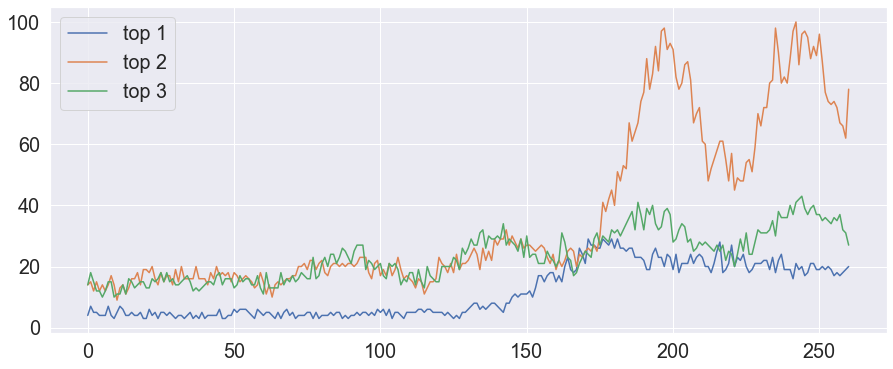

In [27]:
df.plot(figsize=(15,6))

### Observation 

- The above line graph show us the distributio of the variable accross the years 
- it shows that the lie graph of the variable top 2 was having a considerable growth.

## Distribution Plot

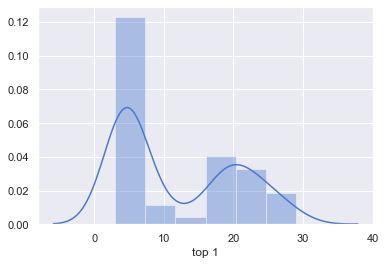

In [28]:
sb.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sb.set_palette(sb.color_palette("muted"))

sb.distplot(df["top 1"].dropna());

### Observation


- The Graph is not a normal distributed graph 

The kurtosis of Sale Price is  -1.3837954497502456
The Skewness of Sale Price is  0.5015322104940879


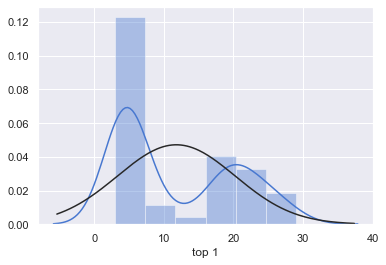

In [47]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 1'].kurtosis())
print('The Skewness of Sale Price is ', df['top 1'].skew())
sb.distplot(df['top 1'],fit=stats.norm)


### Observation:


- This above variable skew and kurtosis is determined using the predefined libraries 
- thevaribale is forcdfully fitted ith normal distribution to just get an overview of the applicable data 

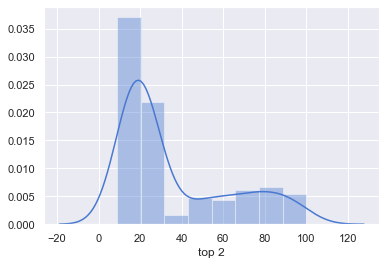

In [29]:
sb.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sb.set_palette(sb.color_palette("muted"))

sb.distplot(df["top 2"].dropna());


### Observation

- it is not a noraml distribution

In [48]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 2'].kurtosis())
print('The Skewness of Sale Price is ', df['top 2'].skew())

The kurtosis of Sale Price is  -0.37963706523181306
The Skewness of Sale Price is  1.064666177586757


In [ ]:
from scipy import stats
print('The kurtosis of Sale Price is ', df['top 1'].kurtosis())
print('The Skewness of Sale Price is ', df['top 1'].skew())

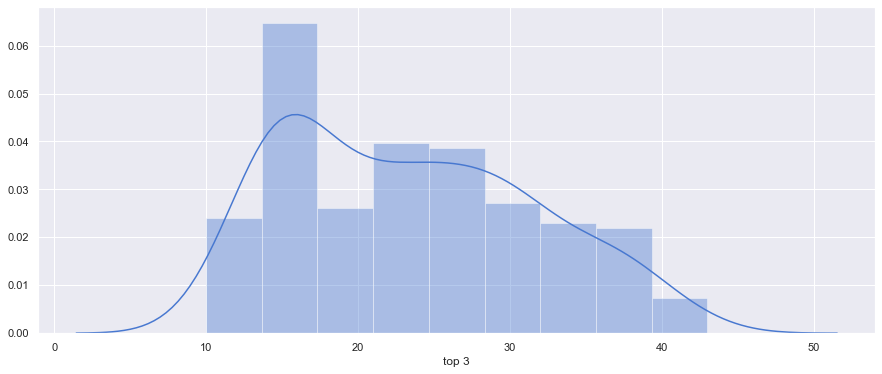

In [30]:
fig,ax =plt.subplots(figsize=(15,6))
sb.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sb.set_palette(sb.color_palette("muted"))

sb.distplot(df["top 3"].dropna());

###  Observation

- it is not a normally distributed variable 

In [31]:
df['date'] = df['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

In [32]:
df['date'] = pd.to_datetime(df['date'])

In [33]:
df.dtypes

top 1             int64
top 2             int64
top 3             int64
date     datetime64[ns]
dtype: object

In [34]:
a=df['date'].groupby([df.date.dt.year,df['top 1'],df['top 2'],df['top 3'],df.date.dt.month]).agg('count')

In [35]:
print(a)

date  top 1  top 2  top 3  date
2012  3      14     10     12      1
      4      12     12     11      2
             14     10     11      1
                    14     10      1
             17     15     12      1
                                  ..
2017  22     90     38     4       1
      23     49     24     1       1
             81     35     4       1
      24     48     25     1       1
             80     36     4       1
Name: date, Length: 258, dtype: int64


In [36]:
df.groupby(['date', pd.Grouper(key='date', freq='M')])['top 1'].sum()

date        date      
2012-10-07  2012-10-31     4
2012-10-14  2012-10-31     7
2012-10-21  2012-10-31     5
2012-10-28  2012-10-31     5
2012-11-04  2012-11-30     4
                          ..
2017-09-03  2017-09-30    18
2017-09-10  2017-09-30    17
2017-09-17  2017-09-30    18
2017-09-24  2017-09-30    19
2017-10-01  2017-10-31    20
Name: top 1, Length: 261, dtype: int64

## Bar Plot 

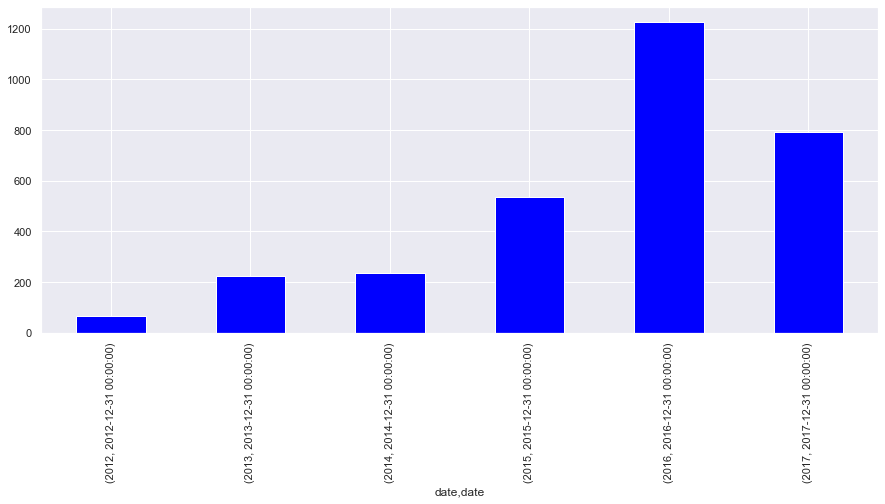

In [37]:
fig,ax =plt.subplots(figsize=(15,6))
df.groupby([df.date.dt.year, pd.Grouper(key='date', freq='y')])['top 1'].sum().plot(kind='bar',color='blue')

### Observation:

- the above Bar chart shows ditribution of the variable top 1 and we seee that the max count of the variable i.e the y axis has a max count of 1200

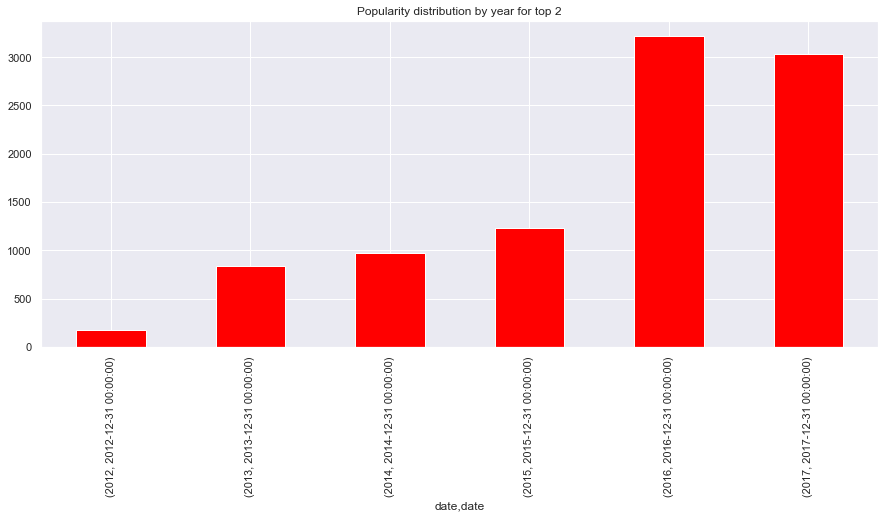

In [38]:
fig,ax =plt.subplots(figsize=(15,6))
df.groupby([df.date.dt.year, pd.Grouper(key='date', freq='y')])['top 2'].sum().plot(kind='bar',color='red', title='Popularity distribution by year for top 2')

### Observation:

-  the above Bar chart shows ditribution of the variable top 21 and we seee that the max count of the variable i.e the y axis has a max count of 3000

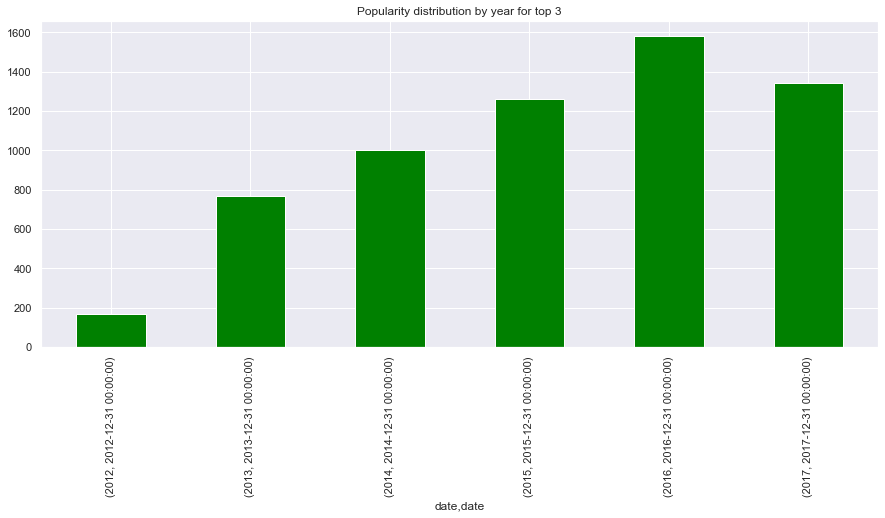

In [39]:
fig,ax =plt.subplots(figsize=(15,6))
df.groupby([df.date.dt.year, pd.Grouper(key='date', freq='y')])['top 3'].sum().plot(kind='bar',color='green', title='Popularity distribution by year for top 3')

### Observations

-  the above Bar chart shows ditribution of the variable top 21 and we seee that the max count of the variable i.e the y axis has a max count of 1600

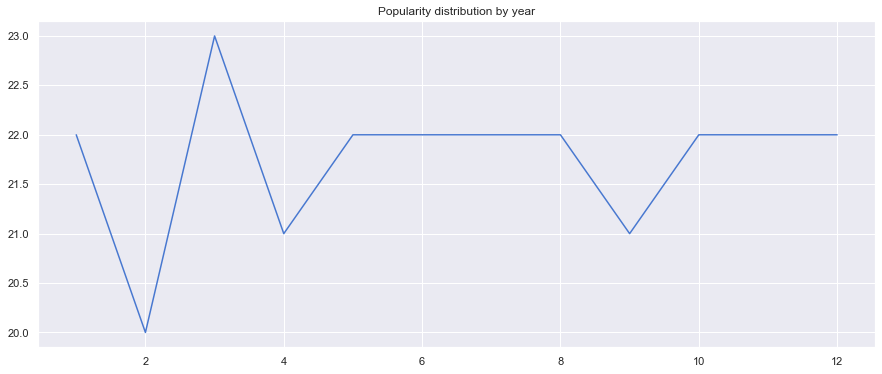

In [40]:
df.date.dt.month.value_counts().sort_index().plot(figsize=(15,6),title='Popularity distribution by year')

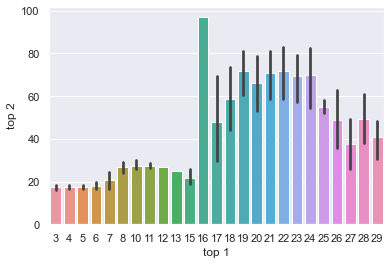

In [41]:
sb.barplot(y=df['top 2'], x=df['top 1'])


In [42]:
df.groupby([df.date.dt.year])['top 2'].sum()

date
2012     175
2013     837
2014     967
2015    1229
2016    3215
2017    3034
Name: top 2, dtype: int64

In [43]:
df.groupby([df.date.dt.year])['top 3'].sum()

date
2012     169
2013     767
2014    1002
2015    1260
2016    1580
2017    1343
Name: top 3, dtype: int64

In [44]:
df.groupby([df.date.dt.year])['top 1'].sum()

date
2012      65
2013     223
2014     235
2015     537
2016    1225
2017     794
Name: top 1, dtype: int64

In [45]:
df.head(50)

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04
5,4,14,10,2012-11-11
6,4,12,12,2012-11-18
7,7,14,15,2012-11-25
8,4,17,15,2012-12-02
9,3,14,10,2012-12-09
